In [1]:
import pandas as pd
import numpy as np

In [2]:
# import data
data = pd.read_csv('hcp_drug_prediction_data_uncleaned.csv')
print(data.shape)

(1204, 75)


In [3]:
# brief glimps of the data
# print(data.head)
print(data.columns) # sub_use = drug label; 0 = no; 1 = yes

Index(['Subject', 'Gender', 'Age', 'PSQI_Score', 'PicSeq_AgeAdj',
       'CardSort_AgeAdj', 'Flanker_AgeAdj', 'PMAT24_A_CR', 'PMAT24_A_SI',
       'PMAT24_A_RTCR', 'ReadEng_AgeAdj', 'PicVocab_AgeAdj',
       'ProcSpeed_AgeAdj', 'DDisc_SV_1mo_200', 'DDisc_SV_6mo_200',
       'DDisc_SV_1yr_200', 'DDisc_SV_3yr_200', 'DDisc_SV_5yr_200',
       'DDisc_SV_10yr_200', 'DDisc_SV_1mo_40K', 'DDisc_SV_6mo_40K',
       'DDisc_SV_1yr_40K', 'DDisc_SV_3yr_40K', 'DDisc_SV_5yr_40K',
       'DDisc_SV_10yr_40K', 'DDisc_AUC_200', 'DDisc_AUC_40K', 'VSPLOT_TC',
       'VSPLOT_CRTE', 'VSPLOT_OFF', 'SCPT_TP', 'SCPT_TN', 'SCPT_FP', 'SCPT_FN',
       'SCPT_TPRT', 'SCPT_SEN', 'SCPT_SPEC', 'SCPT_LRNR', 'IWRD_TOT',
       'IWRD_RTC', 'ListSort_AgeAdj', 'CogFluidComp_AgeAdj',
       'CogEarlyComp_AgeAdj', 'CogTotalComp_AgeAdj', 'CogCrystalComp_AgeAdj',
       'ER40_CR', 'ER40_CRT', 'ER40ANG', 'ER40FEAR', 'ER40HAP', 'ER40NOE',
       'ER40SAD', 'AngAffect_Unadj', 'AngHostil_Unadj', 'AngAggr_Unadj',
       'FearAffect

In [4]:
# gender counts
data.groupby('Gender').size()

Gender
F    655
M    549
dtype: int64

In [5]:
# sub_use counts
data.groupby('sub_use').size()

sub_use
0    911
1    293
dtype: int64

In [6]:
# gender x sub_use counts
data.groupby(['Gender', 'sub_use']).size()

Gender  sub_use
F       0          554
        1          101
M       0          357
        1          192
dtype: int64

In [9]:
data.groupby('Age').size()

Age
22-25    247
26-30    526
31-35    417
36+       14
dtype: int64

In [10]:
# get NA counts in columns
# missing values = NA
na_counts_cols = data.isnull().sum().sort_values(ascending = False)
print(na_counts_cols)

CogTotalComp_AgeAdj      19
CogFluidComp_AgeAdj      18
CogEarlyComp_AgeAdj      15
SCPT_TPRT                12
CogCrystalComp_AgeAdj    10
VSPLOT_CRTE               9
VSPLOT_TC                 9
PMAT24_A_CR               9
PMAT24_A_SI               9
PMAT24_A_RTCR             9
DDisc_SV_5yr_200          8
SCPT_TP                   8
IWRD_RTC                  8
IWRD_TOT                  8
SCPT_SPEC                 8
SCPT_SEN                  8
DDisc_SV_1mo_200          8
SCPT_FN                   8
SCPT_FP                   8
SCPT_TN                   8
VSPLOT_OFF                8
DDisc_SV_10yr_200         8
DDisc_SV_6mo_200          8
DDisc_SV_1yr_200          8
DDisc_AUC_40K             8
DDisc_SV_3yr_200          8
DDisc_SV_10yr_40K         8
DDisc_SV_5yr_40K          8
DDisc_SV_3yr_40K          8
DDisc_SV_1yr_40K          8
                         ..
NEOFAC_A                  7
CardSort_AgeAdj           3
InstruSupp_Unadj          2
EmotSupp_Unadj            2
PicSeq_AgeAdj       

In [11]:
# get NA counts in rows
na_counts_rows = data.isnull().sum(axis = 1)
print(na_counts_rows)
sum(na_counts_rows > 0) # number of subjects missing ANY measure

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1174    0
1175    0
1176    0
1177    0
1178    0
1179    0
1180    0
1181    0
1182    0
1183    0
1184    0
1185    0
1186    0
1187    0
1188    0
1189    0
1190    0
1191    0
1192    0
1193    0
1194    0
1195    0
1196    0
1197    0
1198    0
1199    0
1200    0
1201    0
1202    0
1203    0
Length: 1204, dtype: int64


35

In [12]:
# figure out which and how many subjects are missing a measure 
missing_data_rows = (na_counts_rows > 0) # figure out which subjects are missing a measure
data.loc[missing_data_rows].groupby(['Gender','sub_use']).size() # number of subjects (gender x sub_use) with missing data

Gender  sub_use
F       0          22
        1           4
M       0           6
        1           3
dtype: int64

In [13]:
# remove subjects with a missing measure from the data
clean_data = data[-missing_data_rows]
print(clean_data.shape)
clean_data = clean_data.reset_index(drop=True)
# clean_data.groupby(['Gender', 'sub_use']).size()
# print(clean_data.head)

(1169, 75)


In [14]:
clean_data['Age'].unique()

array(['22-25', '26-30', '31-35', '36+'], dtype=object)

In [15]:
# 1 = 22-25
# 2 = 26-30
# 3 = 31-35
age_recoded = np.where(clean_data['Age']=='22-25', 1, 
                  np.where(clean_data['Age']=='26-30', 2, 
                      np.where(clean_data['Age']=='31-35', 3, 4))) 
print(age_recoded.shape)

(1169,)


In [16]:
# 0 = Male
# 1 = Female
gender_recoded = np.where(clean_data['Gender'] == 'M', 0, 1)

In [17]:
clean_data.shape

(1169, 75)

In [18]:
clean_data = pd.concat([clean_data, pd.DataFrame({'Age_recoded': age_recoded, 'Gender_recoded': gender_recoded})], axis = 1)
clean_data = clean_data.drop(['Age', 'Gender'], axis = 1)

In [19]:
print(clean_data.head())
print(clean_data.shape)

   Subject  PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  \
0   100004           8         112.44            88.64          111.01   
1   100206           6         118.78           104.94          116.55   
2   100307           4         103.45           109.92          101.90   
3   100408           4         125.19           100.77          113.51   
4   100610           4         101.69           115.18          114.18   

   PMAT24_A_CR  PMAT24_A_SI  PMAT24_A_RTCR  ReadEng_AgeAdj  PicVocab_AgeAdj  \
0         19.0          0.0        15590.0        96.91405         104.9375   
1         20.0          0.0        18574.5       103.44410         117.0361   
2         17.0          2.0        11839.0        98.73000          96.8100   
3          7.0         12.0         3042.0       125.64000         132.6300   
4         23.0          0.0        12280.0       132.41240         146.5971   

   ...  PercStress_Unadj  SelfEff_Unadj  NEOFAC_A  NEOFAC_O  NEOFAC_C  \
0  ... 

In [26]:
# gender x sub_use numbers
print(clean_data.groupby(['Gender_recoded', 'sub_use']).size())

# percentage by gender
print(189/(351+189))
print(97/(532+97))

# percentage overall
print((189+97)/1169)

Gender_recoded  sub_use
0               0          351
                1          189
1               0          532
                1           97
dtype: int64
0.35
0.15421303656597773
0.2446535500427716


In [19]:
# output the clean data
clean_data.to_csv('hcp_drug_prediction_data_cleaned.csv', index = False)

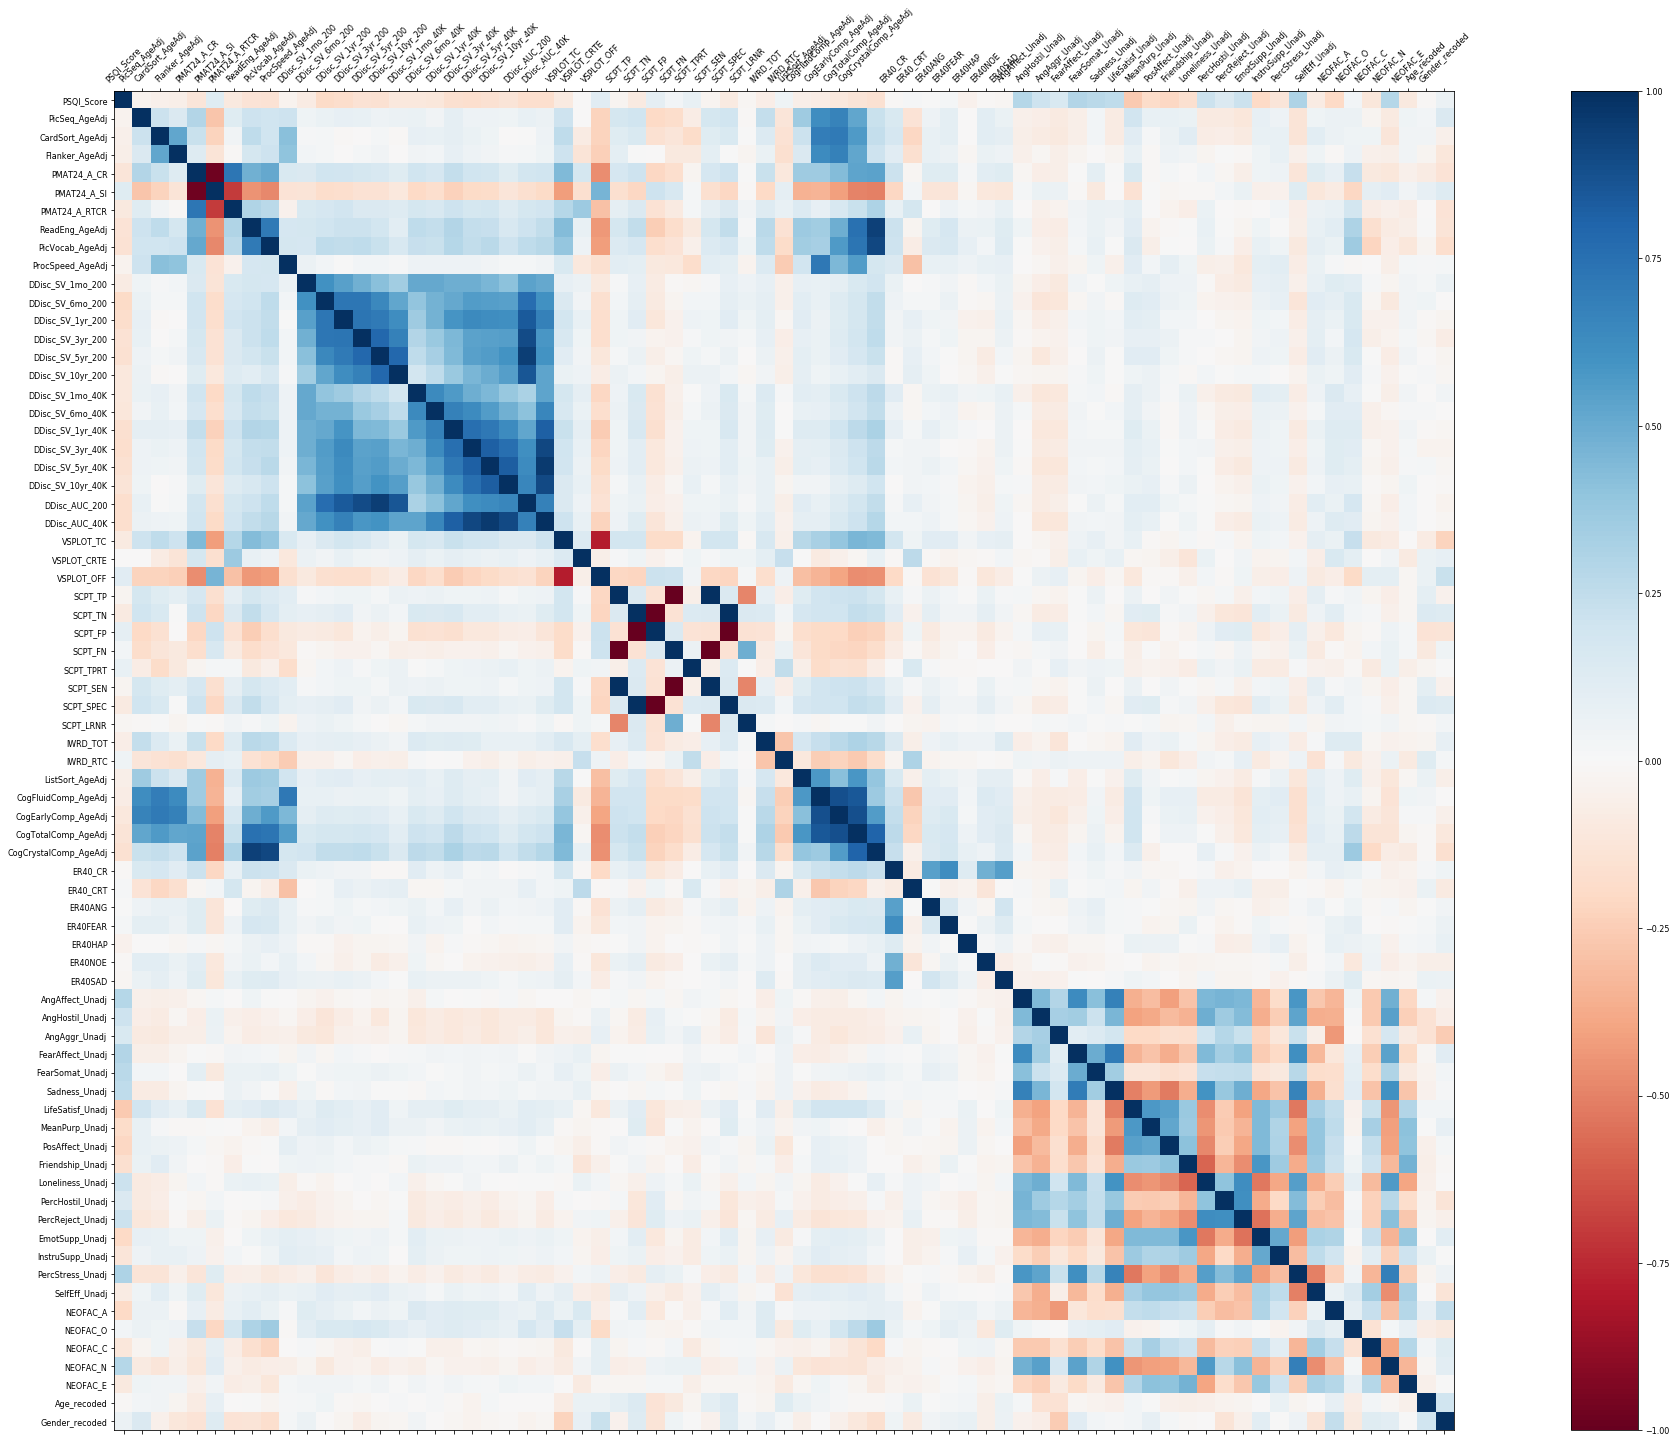

In [21]:
#correlation matrix



Corr_matrix = clean_data.drop(['Subject', 'sub_use'], axis = 1) # axis = 1 refers to columns, axis = 0 refers to row


import matplotlib.pyplot as plt



f = plt.figure(figsize=(42, 24))
plt.matshow(Corr_matrix.corr(), fignum=f.number, cmap='RdBu')
plt.xticks(range(Corr_matrix.shape[1]), Corr_matrix.columns, fontsize=8, rotation=45)
plt.yticks(range(Corr_matrix.shape[1]), Corr_matrix.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)